<a href="https://colab.research.google.com/github/zildj/CPE695-Applied-Machine-Learning/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In-sample score (training):  0.9224890829694323
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       573
           1       0.94      0.85      0.89       343

    accuracy                           0.92       916
   macro avg       0.93      0.91      0.92       916
weighted avg       0.92      0.92      0.92       916

Out-of-sample score (testing):  0.7531806615776081
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       236
           1       0.70      0.66      0.68       157

    accuracy                           0.75       393
   macro avg       0.74      0.74      0.74       393
weighted avg       0.75      0.75      0.75       393



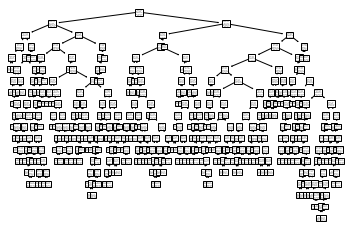

In [16]:
f=pd.read_csv("Titanic.csv")
data=f[["pclass","sex", "age","sibsp"]].values
for i in range(data[0].size):
    data[:,i] = preprocessing.LabelEncoder().fit_transform(data[:,i])
xTrain, xTest, yTrain, yTest = train_test_split(data, f.survived.values, test_size=0.30)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xTrain,yTrain)
tree.plot_tree(clf, feature_names=["pclass","sex", "age","sibsp"], class_names=["no","yes"])
print("In-sample score (training): ",clf.score(xTrain,yTrain))
print(classification_report(yTrain, clf.predict(xTrain)))
print("Out-of-sample score (testing): ",clf.score(xTest,yTest))
print(classification_report(yTest, clf.predict(xTest)))

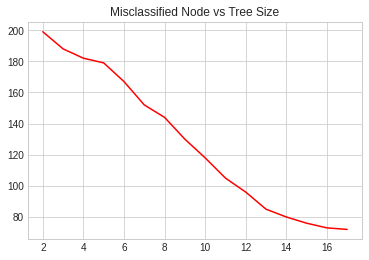

In [17]:
depth = []
misclass = []

for i in range(2,clf.get_depth()):
    f1=0
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(xTrain,yTrain)
    yPred=clf.predict(xTrain)
    for j in range(0,len(yPred)):
        if yPred[j] != yTrain[j] :
            f1=f1+1
    depth.append(i)
    misclass.append(f1)

plt.style.use('seaborn-whitegrid') 
plt.title("Misclassified Node vs Tree Size")
plt.plot(depth,misclass,'r')
plt.show()

In-sample score (training):  0.8013100436681223
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       573
           1       0.76      0.68      0.72       343

    accuracy                           0.80       916
   macro avg       0.79      0.78      0.78       916
weighted avg       0.80      0.80      0.80       916

Out-of-sample score (testing):  0.7913486005089059
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       236
           1       0.77      0.68      0.72       157

    accuracy                           0.79       393
   macro avg       0.79      0.77      0.78       393
weighted avg       0.79      0.79      0.79       393



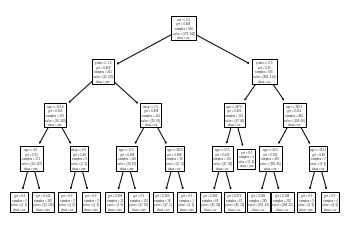

In [19]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(xTrain,yTrain)
tree.plot_tree(clf, feature_names=["pclass","sex", "age","sibsp"], class_names=["no","yes"])
print("In-sample score (training): ",clf.score(xTrain,yTrain))
print(classification_report(yTrain, clf.predict(xTrain)))
print("Out-of-sample score (testing): ",clf.score(xTest,yTest))
print(classification_report(yTest, clf.predict(xTest)))